# Predicting the Success of Starbucks Locations (part 2)

**Author**: <a href = "https://www.linkedin.com/in/alexis-raymond-telfer/">Alexis Raymond</a>  
**Date Modified**: 2020-05-15

## Table of Contents

3. [Exploratory Data Analysis](#eda)
4. [Predictive Modeling](#model)

## 3. Exploratory Data Analysis <a name="eda"></a>

Now that we have a clean dataframe with all the selected features for a predictive model, we can explore the data in order to gather some insights.

### Import analysis and visualization libraries

In [1]:
import pandas as pd # library for data analysis
import numpy as np # library to handle data in a vectorized manner

import matplotlib.pyplot as plt # library for simple data visualizations
import seaborn as sns # library for more advanced data visualizations

### Import locations dataframe

In [2]:
starbucks_locations = pd.read_csv("starbucks_ratings.csv") # Read locations dataset in dataframe
starbucks_locations.drop(['Unnamed: 0', 'Store Number', 'Foursquare ID'], 1, inplace=True) # Drop useless columns
starbucks_locations.head() # Show first 5 rows of dataframe

,City,Country,Longitude,Latitude,Area,Density,ATM,Accessories Store,Acupuncturist,Adult Boutique,...,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Yoshoku Restaurant,Zoo,Zoo Exhibit,Distance to HQ,Rating
0,San Diego,US,-116.97,32.63,842.3,1670,0.0,0.000000,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.884501,7.5
1,Dallas,US,-97.04,32.89,882.9,1493,0.0,0.027027,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.252424,8.2
2,Bellevue,US,-122.15,47.60,86.8,1630,0.0,0.000000,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.186999,5.7
3,Seattle,US,-122.33,47.57,217.0,3245,0.0,0.000000,0.0,0.0,...,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012267,6.7
4,Indianapolis,US,-86.26,39.85,936.3,914,0.0,0.000000,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.895006,8.3


### Analyze target feature

The target variable for this research project is the average rating found with the Foursquare Places API for each Starbucks locations. First, let's calculate basic statistics about this feature in order to better understand it.

In [3]:
starbucks_locations['Rating'].describe() # Calculate basic statistics on the ratings

count    384.000000
mean       7.638021
std        0.647641
min        5.500000
25%        7.300000
50%        7.700000
75%        8.100000
max        9.000000
Name: Rating, dtype: float64

In order to better understand the value of this rating, we must have a better idea of how it is distributed. The first step in doing so is to visualize it using an histogram.

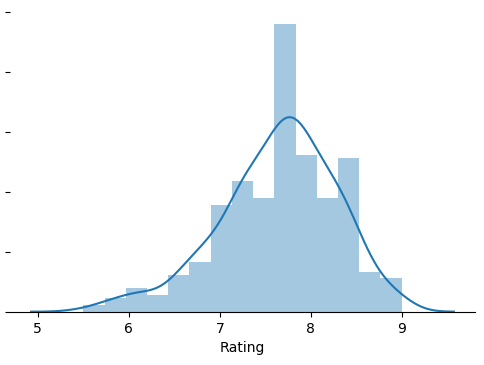

In [4]:
fig, ax = plt.subplots(1,1, dpi = 100) # Create plot

sns.distplot(starbucks_locations['Rating'], bins=15) # Create histogram with KDE for the ratings distribution

ax.get_yaxis().set_ticklabels([]) # Remove y tick labels
sns.despine(left = True) # Remove all spines except for the bottom one

plt.savefig('Exported Images/ratings_dist.png') # Save histogram to PNG

It seems like the distribution is normally centered around the value of 7.75. This makes sense knowing that its mean is 7.64 and that 50% of the ratings are between the values of 7.30 and 8.10. Now, we can represent it with a box plot in order to see if there are multiple outliers.

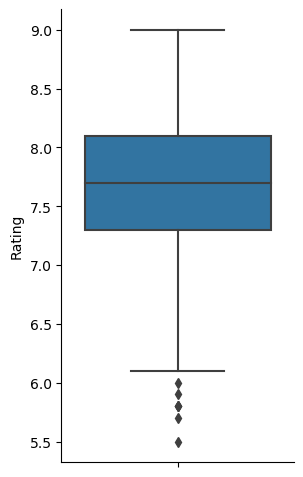

In [5]:
fig, ax = plt.subplots(1,1, figsize = (3, 6), dpi = 100) # Create plot

sns.boxplot(y = 'Rating', data = starbucks_locations) # Create boxplot for the ratings distribution

sns.despine() # Remove the top and right spines

plt.savefig('Exported Images/ratings_box.png') # Save boxplot to PNG

This boxplot tells us that there are only 5 outliers in the 384 observations and that all of them are between the value of 5.5 and 6.

### Relationship between distance to headquarter and rating

Before starting the exploratory data analysis, one hypothesis was that the further away a Starbucks location was to the Seattle headquarters, the less successful it was. It is now time to evaluate this theory by visualizing the relationship between the two variables. 

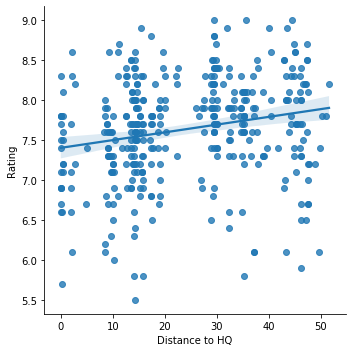

In [6]:
sns.lmplot(x = 'Distance to HQ', y = 'Rating', data = starbucks_locations) # Create regression plot showing the relationship between the distance to HQ and rating variables

plt.savefig('Exported Images/ratings_distance_regression.png') # Save regression plot to PNG

In [7]:
starbucks_locations[['Distance to HQ', 'Rating']].corr() # Calculate correlation 

,Distance to HQ,Rating
Distance to HQ,1.000000,0.211651
Rating,0.211651,1.000000


Interestingly, the linear regression plot above proves that our hypothesis was wrong. In fact, the correlation coefficient between the two variables is 0.21 which is low. On top of that, the regression slope is in the opposite direction from what was expected. Being positive, it supposes that the further away a store is from the HQ, the most successful it is. However, since the correlation is so low, we must conclude that there is no relationship between the distance to HQ and the success of the location.

### City demographics

In order for a predictive model to be efficient, it cannot have two correlated features. Therefore, we need to verify that the area and population density variables are not tied to eachother.

In [8]:
starbucks_locations[['Area', 'Density']].corr() # Calculate correlation

,Area,Density
Area,1.000000,-0.059377
Density,-0.059377,1.000000


As we can tell by the extremely low correlation coefficient of -0.06, there is no correlation between the area and population density variables. We can keep both variables in the model. Now, let's see if they are correlated with the location's rating.

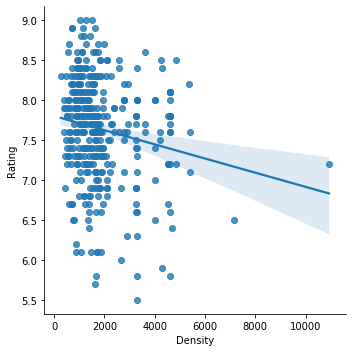

In [9]:
sns.lmplot(x = 'Density', y = 'Rating', data = starbucks_locations) # Create regression plot showing the relationship between the population density and rating variables

plt.savefig('Exported Images/ratings_density_regression.png') # Save regression plot to PNG

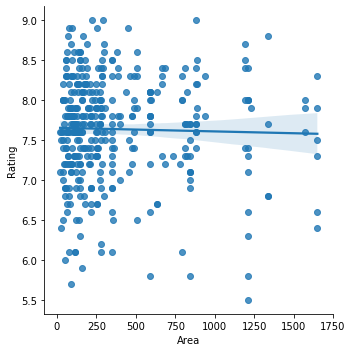

In [10]:
sns.lmplot(x = 'Area', y = 'Rating', data = starbucks_locations) # Create regression plot showing the relationship between the area and rating variables

plt.savefig('Exported Images/ratings_area_regression.png') # Save regression plot to PNG

In [11]:
starbucks_locations[['Density', 'Area', 'Rating']].corr() # Calculate correlation

,Density,Area,Rating
Density,1.000000,-0.059377,-0.170977
Area,-0.059377,1.000000,-0.026415
Rating,-0.170977,-0.026415,1.000000


Once again, contrary to what was expected, there doesn't seem to be a correlation between the demographics of a city and the success of the Starbucks in it. In fact, the correlation coefficient between the areas and the ratings is -0.03 which is extremely low and the one between the densities and the ratings is -0.17 which is low as well.

## 4. Predictive Modeling <a name="model"></a>

Now that we have a clean dataset and that some basic data analysis has been performed, we are ready to create the predictive model.

### Training and Testing Data

First, we must split the data into training and testing sets. We will start by assigning our target variable (the rating) to the variable y. Then we will assign all other numerical features we have collected to the variable x.

In [17]:
y = starbucks_locations['Rating'] # 'y' is be our target variable (Ratings)

In [34]:
X = starbucks_locations.drop(['City','Country','Longitude','Latitude','Rating'], axis=1) # 'x' is a dataframe containing all numerical features except the rating

Now let's import a library that will allow us to split the dataset into a training and testing set.

In [25]:
from sklearn.model_selection import train_test_split # import library to split the dataset

Finally, we will split our entire dataset into a training set to train the model to predict ratings and a testing set to assess the effectiveness of the model. I have chosen to use 70% of the rows for training and 30% for testing.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # split the dataset into training and testing sets

### Training the Model

Second, we need to create and train a model using our training dataset to predict ratings. I have chosen to use linear regression as I am trying to predict a quantitative value as opposed to categorizing it.

In [29]:
from sklearn.linear_model import LinearRegression # import linear regression libraries

In [36]:
lm = LinearRegression() # create linear regression model

In [37]:
lm.fit(X_train, y_train) # train the newly created linear regression model using our training datasets created above

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's show the five coefficients that have the most positive impact on the location's rating and the five that have the most negative impact. While this information is incomplete and should not, by itself, inform business decisions, it can help make sense of the model.

In [53]:
pd.DataFrame(lm.coef_, X.columns, ['Coefficient']).sort_values(['Coefficient'], 0, False) # display the 5 coefficients with the most positive and negative impacts

,Coefficient
Pool Hall,42.075912
Football Stadium,29.261836
Garden Center,28.744047
Pier,26.606394
Plaza,24.067725
...,...
Shoe Repair,-29.349019
French Restaurant,-31.337914
Auto Dealership,-34.840418
Beer Bar,-36.615520


As we can see in the dataframe above, it seems that proximity to a pool hall is the feature that predicts a positive rating the most. This makes sense as cold drinks are often consumed at the same time as going swimming. On the other hand, proximity to a Recreation Center seems to predict a negative rating. This could be due to the fact that people don't usually buy a coffee right before going to the gym.

### Predicting Test Data

Third, we can now use our model to predict the ratings for a testing set. This will give us an indication of how accurate the model is and therefore, if we should rely on its findings to make decisions.

In [54]:
predictions = lm.predict(X_test) # predict the ratings of our testing dataset

Let's create a visual representation of the accuracy of our model. The x axis of the following plot will represent the real rating of a location, and the y axis will show the predicted rating. A perfect model would show an oblique line where the x and y values cross.

Text(0, 0.5, 'Predicted Y')

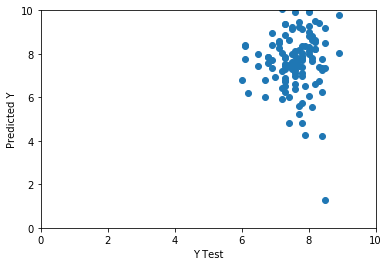

In [58]:
plt.scatter(y_test,predictions) # create a scatter plot of predictions and real values
plt.ylim(0,10) # set the y axis' range to go from 0 to 10
plt.xlim(0,10) # set the x axis' range to go from 0 to 10
plt.xlabel('Y Test') # add a label to the x axis
plt.ylabel('Predicted Y') # add a label to the y axis

At a first glance, we can tell that there are some outliers in our predictions and it is far from being perfect. However, we do see that the points seem to be following some kind of positive linear trend which indicates that the predicting model worked at a certain degree. Let's evaluate it using defined metrics.

### Evaluating the Model

To evaluate the performance of our model, we will calculate the residual sum of squares and the explained variance score. These will give us quantitative indications on the effectiveness of the predicting model.

In [59]:
from sklearn import metrics # import a library to calculate the performance metrics

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) # print the Mean Absolute Error
print('MSE:', metrics.mean_squared_error(y_test, predictions)) # print the Mean Squared Error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) # print the Root Mean Squared Error

MAE: 1.0521733540659381
MSE: 2.1570944834201606
RMSE: 1.4687050362207386


Finally, we'll plot the residuals of the model to see if they follow a normal distribution as they should.

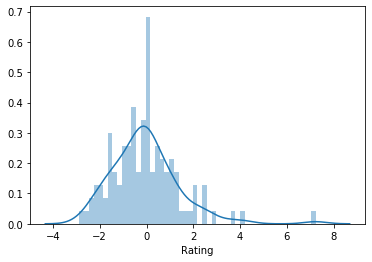

In [61]:
sns.distplot((y_test-predictions), bins=50) # plot the residuals

As you can see, the residuals follow a normal distribution centered around 0. This is another good indication that our model works!

## 5. Conclusion <a name="conclusion"></a>

To conclude, from the model we have created, trained and tested, it seems as though our hypothesis that city demographics have a great influence on the success of a Starbucks store were false. In fact, we found that factors such as the area, population density, and distance from the headquarter of a city had little to no correlation to the rating of a Starbucks. However, we found that the type of building/commerce located close to a Starbucks have a great impact on its success. Notably, the three types of commerce correlated to a high rating were pool halls, football stadiums, and garden centers and the three types of commerce correlated to a low rating were recreation centers, beer bars and auto dealerships.

It is important to rememeber the caveats of this research. First, the target variable we used was far from perfect as it was crowdsourced and only an indication of customer satisfaction as opposed to financial success. Second, the model developed is not 100% accurate and its results should be taken with a grain of salt. Finally, the model was trained using a small dataset because of the discussed limitations. This has contributed to less accuracy.

*Note: This notebook only represents the second half of the project. It was used to perform some exploratory data analysis and create, train and test the predictive model used to inform the results of the study. The first notebook can be found <a href = "https://github.com/alexis-raymond/Coursera_Data-Science_Capstone">here</a>.*